# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Projeto realizado como requisito parcial para conclusão da disciplina de ICD


Alunos: 

    Deivison Rodrigues Jordão
    Lucas Miranda de Aguiar
    Filipe de Medeiros Santos
    

## Agrupamento (Kmeans)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
db = pd.read_csv("healthcare-dataset-stroke-data.csv")

db.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
db.dropna(inplace=True)

db.shape

(4909, 12)

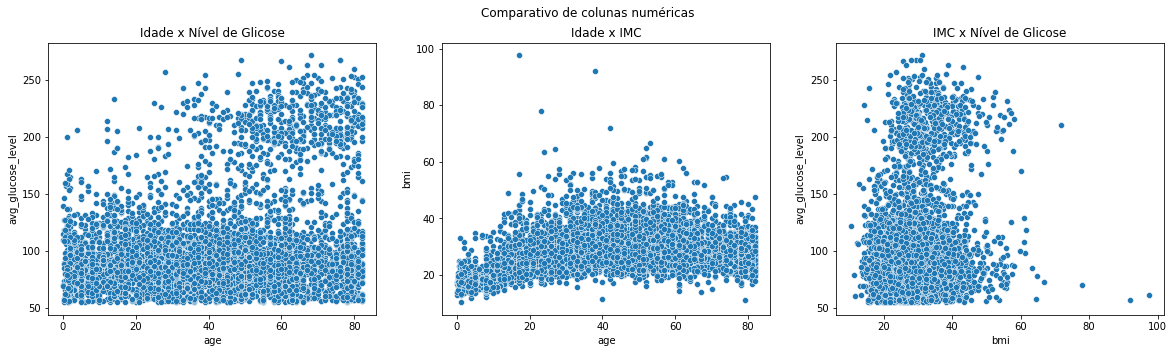

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Comparativo de colunas numéricas')

sns.scatterplot(ax=axes[0], x='age', y='avg_glucose_level', data=db)
axes[0].set_title('Idade x Nível de Glicose')

sns.scatterplot(ax=axes[1], x='age', y='bmi', data=db)
axes[1].set_title('Idade x IMC')

sns.scatterplot(ax=axes[2], x='bmi', y='avg_glucose_level', data=db)
axes[2].set_title('IMC x Nível de Glicose');

Dada a distribuição dos dados com relação as colunas que contém valores contínuos, se configura inviável o agrupamento dos pontos baseado no dataset completo.

## Agrupando Dados

Agrupamento realizado relacionando as colunas compostas de valores contínuos.

In [5]:
# Função para plotar gráficos de dispersão de acordo com os grupos formados

def group_Kmeans(df,X,Y,n):
    group = df[[X,Y]]
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(group)
    sns.scatterplot(data=group, x=X, y=Y, hue=kmeans.labels_, palette="muted")

Agrupamento os dados apartir das colunas **age(idade)** e **bmi(imc)**:

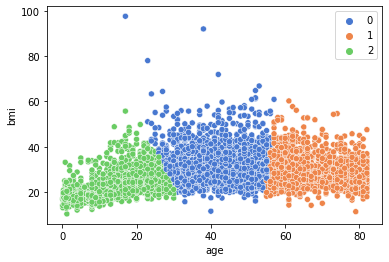

In [6]:
# Com relação a todo o database

group_Kmeans(db,"age", "bmi",3)

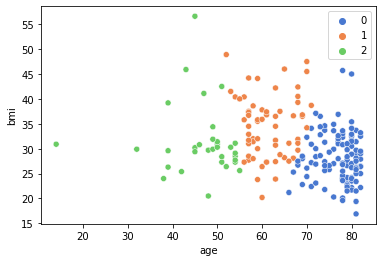

In [7]:
# Com relação aos indivíduos que tiveram AVC

group = db[db.stroke == 1]
group_Kmeans(group,"age", "bmi", 3)

Observa-se a ineficácia do método de agrupamento kmeans neste caso em específico, dado que não é retornada nenhuma informação revelante, com base na inexistência de quaisquer padrões nos grupos encontrados.
Ex.: uma pessoa de 20 anos pode ter o mesmo bmi de uma pessoa 60 ou até mesmo 80.

Agrupando os dados apartir das colunas **age (idade)** e **avg_glucose_level (nível de glicose)**:

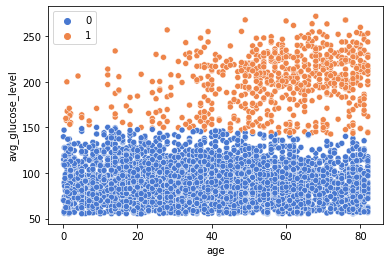

In [8]:
# Com relação a todo o database

group_Kmeans(db,"age", "avg_glucose_level",2)

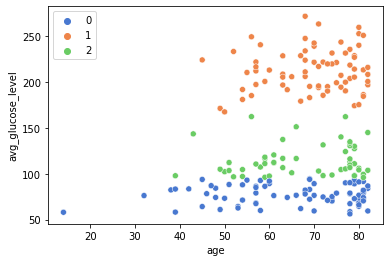

In [9]:
# Com relação aos indivíduos que tiveram AVC

group_Kmeans(group,"age", "avg_glucose_level",3)

Em consonância com o agrupamento realizado anteriormente, o KMeans não retornou resultados relevantes ao ser aplicados nas colunas tratadas, uma vez que, os grupos encontrados foram formados com base, unicamente, na divisão dos pontos em alta e baixa taxa de glicose.

Agrupando os dados com base nas colunas **bmi (imc)** e **avg_glucose_level (nível de glicose)**:

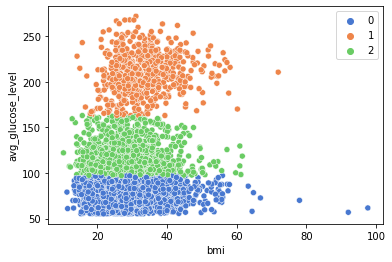

In [10]:
# Com relação a todo o database

group_Kmeans(db,"bmi", "avg_glucose_level",3)

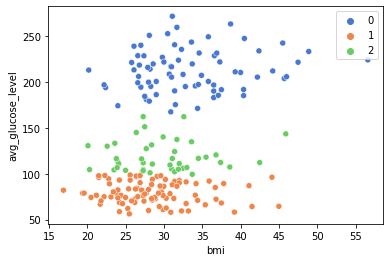

In [11]:
# Com relação aos indíviduos que tiveram AVC

group_Kmeans(group,"bmi", "avg_glucose_level",3)

Reforçando as conclusões anteriores, o kmeans formou os grupos de acordo com o nivel de glicose. Observa-se, contudo, que as pessoas com o nível de glicose normal tendem a uma menor chance de sofrer um avc.

Agrupando os dados apartir das colunas **bmi(imc)** e **avg_glucose_level (nível de glicose)** dos indivíduos pesquisados que tiveram avc:

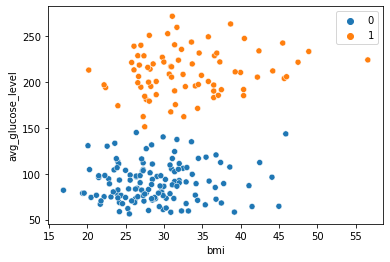

In [12]:
stroke_1 = db[db.stroke==1]
kmeans = KMeans(n_clusters=2)
kmeans.fit(stroke_1[['bmi', 'avg_glucose_level']])

sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_1, hue=kmeans.labels_);

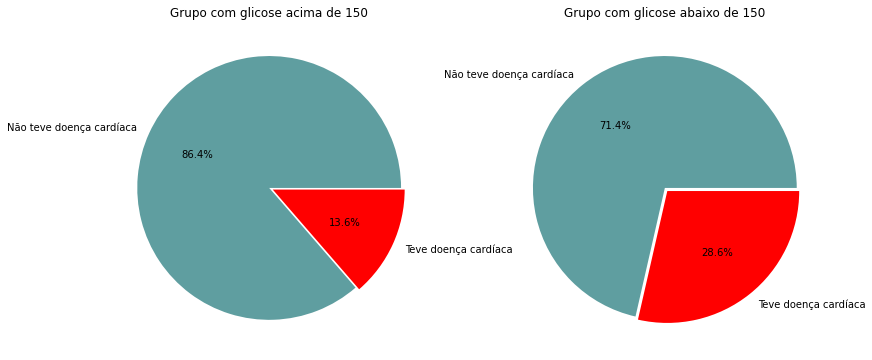

In [13]:
groups = pd.DataFrame({'Grupo 0': stroke_1[kmeans.labels_ == 0].heart_disease.value_counts(),
                       'Grupo 1': stroke_1[kmeans.labels_ == 1].heart_disease.value_counts()})
groups = groups.rename({0:'Não teve doença cardíaca', 1:'Teve doença cardíaca'})

ax = groups.plot.pie(subplots= True, figsize= (13,7), explode=(0, 0.03),
                     legend=False, autopct='%1.1f%%',colors= ['cadetblue','r'])

ax[0].set_title("Grupo com glicose acima de 150")
ax[0].set_ylabel("")
ax[1].set_title("Grupo com glicose abaixo de 150")
ax[1].set_ylabel("");

O grupo de pessoas que tiveram AVC e possuem o nível de glicose abaixo de 150 encontram-se com baixo risco de distúrbios cardíacos, restando demonstrado dos gráficos acima este padrão específico.

### Conclusões:

Conclui-se a partir dos agrupamentos e análises realizados pela inviabilidade da utilização do algoritmo kmeans para o agrupamento dos pontos contidos no dataset e pela sua ineficácia dentro desta pesquisa.
Por fim, não foi formulada nenhuma nova pergunta a partir das analises ora realizadas.